In [1]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt # plotting
import numpy as np # linear algebra
import os # accessing directory structure
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns

In [2]:
survey=pd.read_csv("C:\\Users\\kumar\\Downloads\\masculinity.csv").drop(columns=['Unnamed: 0'])

In [3]:

survey

,StartDate,EndDate,q0001,q0002,q0004_0001,q0004_0002,q0004_0003,q0004_0004,q0004_0005,q0004_0006,...,q0035,q0036,race2,racethn4,educ3,educ4,age3,kids,orientation,weight
0,5/10/18 4:01,5/10/18 4:06,Somewhat masculine,Somewhat important,Not selected,Not selected,Not selected,Pop culture,Not selected,Not selected,...,Middle Atlantic,Windows Desktop / Laptop,Non-white,Hispanic,College or more,College or more,35 - 64,No children,Gay/Bisexual,1.714026
1,5/10/18 6:30,5/10/18 6:53,Somewhat masculine,Somewhat important,Father or father figure(s),Not selected,Not selected,Not selected,Not selected,Not selected,...,East North Central,iOS Phone / Tablet,White,White,Some college,Some college,65 and up,Has children,Straight,1.247120
2,5/10/18 7:02,5/10/18 7:09,Very masculine,Not too important,Father or father figure(s),Not selected,Not selected,Not selected,Not selected,Other (please specify),...,East North Central,Windows Desktop / Laptop,White,White,College or more,College or more,35 - 64,Has children,Straight,0.515746
3,5/10/18 7:27,5/10/18 7:31,Very masculine,Not too important,Father or father figure(s),Mother or mother figure(s),Other family members,Not selected,Not selected,Not selected,...,East North Central,Windows Desktop / Laptop,White,White,Some college,Some college,65 and up,Has children,No answer,0.600640
4,5/10/18 7:35,5/10/18 7:42,Very masculine,Very important,Not selected,Not selected,Other family members,Not selected,Not selected,Not selected,...,East North Central,Windows Desktop / Laptop,White,White,College or more,College or more,35 - 64,No children,Straight,1.033400
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1184,5/19/18 7:50,5/19/18 8:00,Somewhat masculine,Not at all important,Not selected,Mother or mother figure(s),Not selected,Not selected,Not selected,Not selected,...,East North Central,Windows Desktop / Laptop,Non-white,Other,Some college,Some college,35 - 64,No children,Gay/Bisexual,1.571755
1185,5/19/18 7:52,5/19/18 8:03,Somewhat masculine,Somewhat important,Not selected,Not selected,Not selected,Not selected,Not selected,Other (please specify),...,New England,Windows Desktop / Laptop,White,White,High school or less,High school or less,35 - 64,Has children,Straight,2.446719
1186,5/19/18 7:58,5/19/18 8:04,Very masculine,Very important,Father or father figure(s),Mother or mother figure(s),Not selected,Not selected,Not selected,Not selected,...,Pacific,iOS Phone / Tablet,White,White,Some college,Some college,65 and up,Has children,Straight,0.615180
1187,5/19/18 8:52,5/19/18 8:59,Somewhat masculine,Very important,Father or father figure(s),Mother or mother figure(s),Not selected,Pop culture,Not selected,Not selected,...,Middle Atlantic,iOS Phone / Tablet,Non-white,Other,College or more,College or more,18 - 34,No children,Straight,2.965508


In [4]:
print(survey.columns)

Index(['StartDate', 'EndDate', 'q0001', 'q0002', 'q0004_0001', 'q0004_0002',
       'q0004_0003', 'q0004_0004', 'q0004_0005', 'q0004_0006', 'q0005',
       'q0007_0001', 'q0007_0002', 'q0007_0003', 'q0007_0004', 'q0007_0005',
       'q0007_0006', 'q0007_0007', 'q0007_0008', 'q0007_0009', 'q0007_0010',
       'q0007_0011', 'q0008_0001', 'q0008_0002', 'q0008_0003', 'q0008_0004',
       'q0008_0005', 'q0008_0006', 'q0008_0007', 'q0008_0008', 'q0008_0009',
       'q0008_0010', 'q0008_0011', 'q0008_0012', 'q0009', 'q0010_0001',
       'q0010_0002', 'q0010_0003', 'q0010_0004', 'q0010_0005', 'q0010_0006',
       'q0010_0007', 'q0010_0008', 'q0011_0001', 'q0011_0002', 'q0011_0003',
       'q0011_0004', 'q0011_0005', 'q0012_0001', 'q0012_0002', 'q0012_0003',
       'q0012_0004', 'q0012_0005', 'q0012_0006', 'q0012_0007', 'q0013',
       'q0014', 'q0015', 'q0017', 'q0018', 'q0019_0001', 'q0019_0002',
       'q0019_0003', 'q0019_0004', 'q0019_0005', 'q0019_0006', 'q0019_0007',
       'q0020_0001',

In [5]:
survey['q0026'].value_counts()
survey[['q0026']].isnull().sum()

q0026    0
dtype: int64

In [6]:
# Ideas of Masculinity to Map:
ideas_cols_to_map = ['q0001', 'q0002'] #4 choices each
sexual_orientation = ['q0026']
lifestyle_cols_to_map_nomasc = ["q0007_0002", "q0007_0003", "q0007_0004", "q0007_0007", "q0007_0010", "q0007_0011"]
lifestyle_cols_to_map_masc = ["q0007_0005", "q0007_0006", "q0007_0008", "q0007_0009"]
cols_to_map = lifestyle_cols_to_map_nomasc + lifestyle_cols_to_map_masc

In [7]:
cols_to_map = lifestyle_cols_to_map_nomasc + lifestyle_cols_to_map_masc

for column in lifestyle_cols_to_map_nomasc:
    survey[column] = survey[column].map({"Often": 0, "Sometimes": 1, "Rarely": 2, "No answer": 3, "Never, but open to it": 3, "Never, and not open to it": 4})
    
for column in lifestyle_cols_to_map_masc:
    survey[column] = survey[column].map({"Often": 4, "Sometimes": 3, "Rarely": 2, "Never, but open to it": 1, "Never, and not open to it": 0})
    
survey['q0001'] = survey['q0001'].map({"Very masculine": 3, "Somewhat masculine": 2, "Not very masculine": 1, "Not at all masculine": 0})
survey['q0002'] = survey['q0002'].map({"Very important:": 3, "Somewhat important": 2, "Not too important": 1, "Not at all important": 0})

In [8]:
survey[['q0026', 'orientation']]

,q0026,orientation
0,Gay,Gay/Bisexual
1,Straight,Straight
2,Straight,Straight
3,No answer,No answer
4,Straight,Straight
...,...,...
1184,Bisexual,Gay/Bisexual
1185,Straight,Straight
1186,Straight,Straight
1187,Straight,Straight


In [9]:
#mapping sexual orientation: straight = 1, else 0    

survey['q0026'] = survey['q0026'].map(lambda x: 1 if x == 'Straight' else 0)

In [10]:
# 'needed' in the sense that this is information that we want to investigate our question
needed_df = survey.dropna(subset = ideas_cols_to_map + sexual_orientation + cols_to_map)
needed_df = needed_df[ideas_cols_to_map + sexual_orientation + cols_to_map]

In [11]:
survey

,StartDate,EndDate,q0001,q0002,q0004_0001,q0004_0002,q0004_0003,q0004_0004,q0004_0005,q0004_0006,...,q0035,q0036,race2,racethn4,educ3,educ4,age3,kids,orientation,weight
0,5/10/18 4:01,5/10/18 4:06,2.0,2.0,Not selected,Not selected,Not selected,Pop culture,Not selected,Not selected,...,Middle Atlantic,Windows Desktop / Laptop,Non-white,Hispanic,College or more,College or more,35 - 64,No children,Gay/Bisexual,1.714026
1,5/10/18 6:30,5/10/18 6:53,2.0,2.0,Father or father figure(s),Not selected,Not selected,Not selected,Not selected,Not selected,...,East North Central,iOS Phone / Tablet,White,White,Some college,Some college,65 and up,Has children,Straight,1.247120
2,5/10/18 7:02,5/10/18 7:09,3.0,1.0,Father or father figure(s),Not selected,Not selected,Not selected,Not selected,Other (please specify),...,East North Central,Windows Desktop / Laptop,White,White,College or more,College or more,35 - 64,Has children,Straight,0.515746
3,5/10/18 7:27,5/10/18 7:31,3.0,1.0,Father or father figure(s),Mother or mother figure(s),Other family members,Not selected,Not selected,Not selected,...,East North Central,Windows Desktop / Laptop,White,White,Some college,Some college,65 and up,Has children,No answer,0.600640
4,5/10/18 7:35,5/10/18 7:42,3.0,NaN,Not selected,Not selected,Other family members,Not selected,Not selected,Not selected,...,East North Central,Windows Desktop / Laptop,White,White,College or more,College or more,35 - 64,No children,Straight,1.033400
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1184,5/19/18 7:50,5/19/18 8:00,2.0,0.0,Not selected,Mother or mother figure(s),Not selected,Not selected,Not selected,Not selected,...,East North Central,Windows Desktop / Laptop,Non-white,Other,Some college,Some college,35 - 64,No children,Gay/Bisexual,1.571755
1185,5/19/18 7:52,5/19/18 8:03,2.0,2.0,Not selected,Not selected,Not selected,Not selected,Not selected,Other (please specify),...,New England,Windows Desktop / Laptop,White,White,High school or less,High school or less,35 - 64,Has children,Straight,2.446719
1186,5/19/18 7:58,5/19/18 8:04,3.0,NaN,Father or father figure(s),Mother or mother figure(s),Not selected,Not selected,Not selected,Not selected,...,Pacific,iOS Phone / Tablet,White,White,Some college,Some college,65 and up,Has children,Straight,0.615180
1187,5/19/18 8:52,5/19/18 8:59,2.0,NaN,Father or father figure(s),Mother or mother figure(s),Not selected,Pop culture,Not selected,Not selected,...,Middle Atlantic,iOS Phone / Tablet,Non-white,Other,College or more,College or more,18 - 34,No children,Straight,2.965508


In [12]:
needed_df

,q0001,q0002,q0026,q0007_0002,q0007_0003,q0007_0004,q0007_0007,q0007_0010,q0007_0011,q0007_0005,q0007_0006,q0007_0008,q0007_0009
0,2.0,2.0,0,0,0,0,0,4,0,0.0,0.0,3.0,3.0
1,2.0,2.0,1,1,3,2,4,1,3,0.0,2.0,4.0,0.0
2,3.0,1.0,1,1,1,2,4,2,4,1.0,4.0,2.0,3.0
3,3.0,1.0,0,2,1,2,4,4,4,2.0,4.0,0.0,2.0
5,3.0,2.0,1,1,1,2,4,3,4,1.0,4.0,3.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1182,2.0,2.0,1,2,4,4,4,4,1,1.0,2.0,0.0,0.0
1183,3.0,0.0,1,0,1,1,4,3,1,0.0,2.0,0.0,2.0
1184,2.0,0.0,0,1,0,1,1,4,3,3.0,3.0,0.0,3.0
1185,2.0,2.0,1,1,2,2,4,1,2,1.0,4.0,4.0,4.0


In [13]:
# The data now needs to be normalized, as ideas_cols_to_map columns were on a 4 points scale, others were on 5.
normalized_df=(needed_df-needed_df.min())/(needed_df.max()-needed_df.min())

In [14]:
normalized_df

,q0001,q0002,q0026,q0007_0002,q0007_0003,q0007_0004,q0007_0007,q0007_0010,q0007_0011,q0007_0005,q0007_0006,q0007_0008,q0007_0009
0,0.666667,1.0,0.0,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.75,0.75
1,0.666667,1.0,1.0,0.25,0.75,0.50,1.00,0.25,0.75,0.00,0.50,1.00,0.00
2,1.000000,0.5,1.0,0.25,0.25,0.50,1.00,0.50,1.00,0.25,1.00,0.50,0.75
3,1.000000,0.5,0.0,0.50,0.25,0.50,1.00,1.00,1.00,0.50,1.00,0.00,0.50
5,1.000000,1.0,1.0,0.25,0.25,0.50,1.00,0.75,1.00,0.25,1.00,0.75,1.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1182,0.666667,1.0,1.0,0.50,1.00,1.00,1.00,1.00,0.25,0.25,0.50,0.00,0.00
1183,1.000000,0.0,1.0,0.00,0.25,0.25,1.00,0.75,0.25,0.00,0.50,0.00,0.50
1184,0.666667,0.0,0.0,0.25,0.00,0.25,0.25,1.00,0.75,0.75,0.75,0.00,0.75
1185,0.666667,1.0,1.0,0.25,0.50,0.50,1.00,0.25,0.50,0.25,1.00,1.00,1.00


In [15]:
from sklearn.model_selection import train_test_split

#recall cols_to_map represents masculine actions, and ideas_cols_to_maps represent masculine opinions 
data = normalized_df[cols_to_map + ideas_cols_to_map]
labels = normalized_df['q0026'] #column on sexual orientation
print(data)
print(labels)

      q0007_0002  q0007_0003  q0007_0004  q0007_0007  q0007_0010  q0007_0011  \
0           0.00        0.00        0.00        0.00        1.00        0.00   
1           0.25        0.75        0.50        1.00        0.25        0.75   
2           0.25        0.25        0.50        1.00        0.50        1.00   
3           0.50        0.25        0.50        1.00        1.00        1.00   
5           0.25        0.25        0.50        1.00        0.75        1.00   
...          ...         ...         ...         ...         ...         ...   
1182        0.50        1.00        1.00        1.00        1.00        0.25   
1183        0.00        0.25        0.25        1.00        0.75        0.25   
1184        0.25        0.00        0.25        0.25        1.00        0.75   
1185        0.25        0.50        0.50        1.00        0.25        0.50   
1188        0.50        0.50        1.00        1.00        1.00        0.50   

      q0007_0005  q0007_0006  q0007_000

In [16]:
train_data, test_data, train_labels, test_labels = train_test_split(data, labels, random_state = 1)

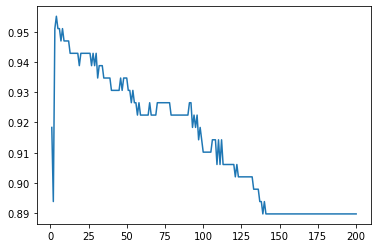

3


In [17]:
#K-Nearest Neighbours Test
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

scores = []
for k in range(1, 201):
    classifier = KNeighborsClassifier(n_neighbors = k)
    classifier.fit(train_data, train_labels)
    scores.append(classifier.score(test_data, test_labels))

plt.plot(range(1,201), scores)
plt.show()
index_max = max(range(len(scores)), key=scores.__getitem__)
print(index_max) #3

In [18]:
classifier = KNeighborsClassifier(n_neighbors = 3)
classifier.fit(train_data, train_labels)
guesses = classifier.predict(test_data)

In [19]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

print(accuracy_score(test_labels, guesses))
print(recall_score(test_labels, guesses))
print(precision_score(test_labels, guesses))
print(f1_score(test_labels, guesses))

0.9510204081632653
0.9908256880733946
0.9557522123893806
0.9729729729729731


In [20]:
normalized_df['q0026'].value_counts() # 848/848 + 129 = 0.86 

1.0    848
0.0    129
Name: q0026, dtype: int64

In [21]:
from collections import Counter
counter = Counter(train_labels)
print(counter)
counter = Counter(test_labels)
print(counter) # 89

Counter({1.0: 630, 0.0: 102})
Counter({1.0: 218, 0.0: 27})


In [22]:
import numpy as np

def average_k_neighbours_testing(iterations, data, labels):
    f1_scores = [] 
    accuracy_scores = []
    for i in range(iterations):
        train_data, test_data, train_labels, test_labels = train_test_split(data, labels, random_state = i)
        #print(f"The trainings labels are distributed {Counter(train_labels)} and the test like so: {Counter(test_labels)}")
        classifier = KNeighborsClassifier(n_neighbors = 3)
        classifier.fit(train_data, train_labels)
        guesses = classifier.predict(test_data)
        f1_scores.append(f1_score(test_labels, guesses))
        accuracy_scores.append(accuracy_score(test_labels, guesses))
        
    plt.plot(range(0,iterations), f1_scores, 'ro')
    plt.xlabel('Random Iteration Number')
    plt.ylabel('F1 Score')
    plt.show()
    
    return sum(f1_scores)/iterations, sum(accuracy_scores)/iterations
    

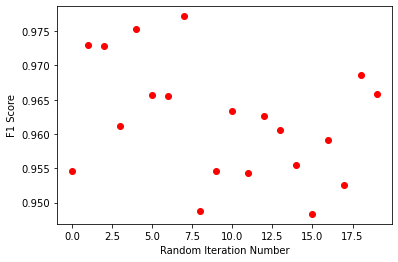

(0.9619647550573509, 0.9322448979591836)

In [23]:
average_k_neighbours_testing(20, data, labels)

In [24]:
from imblearn.over_sampling import SMOTE

oversample = SMOTE()
data, labels = oversample.fit_resample(data, labels)
# summarize the new class distribution
counter = Counter(labels)
print(counter)

Counter({0.0: 848, 1.0: 848})


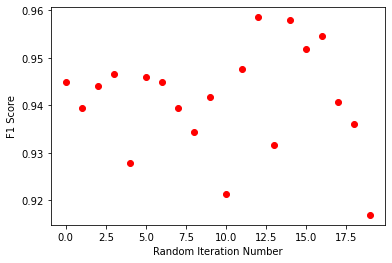

(0.94132510031973, 0.9452830188679243)

In [26]:
average_k_neighbours_testing(20, data, labels)

[0.6492628024710351, 0.3740085855200939, -1.1800423874291808, 9.190695852785142, -0.7223960952976456, -0.3923230612649365, -1.8206759222581452, 1.8780633399483948, 1.267962524176812, -0.2114748658718579, 0.051890337995213136, 0.5498895833548886]


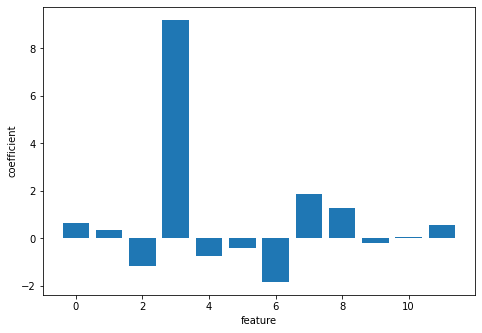

0.9150943396226415


In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

model = LogisticRegression()

train_data, test_data, train_labels, test_labels = train_test_split(data, labels, random_state = 25 )
# Save the model coefficients and intercept here
model.fit(train_data, train_labels)
coefficients = model.coef_

coefficients = coefficients.tolist()[0]
print(coefficients)
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
langs = range(0,12)
students = coefficients
ax.bar(langs,students)
plt.xlabel('feature')
plt.ylabel('coefficient')
plt.show()

predictions = model.predict(test_data)
print(accuracy_score(test_labels, predictions))

#Features in reference:

#["q0007_0002", "q0007_0003", "q0007_0004", "q0007_0007", "q0007_0010", "q0007_0011", # Non-Masc Features 
# "q0007_0005", "q0007_0006", "q0007_0008", "q0007_0009", 'q0001', 'q0002'] # Masc Features

In [28]:
from sklearn.linear_model import LogisticRegression
accuracy = 0
for i in range(0, 20):
    model = LogisticRegression()
    train_data, test_data, train_labels, test_labels = train_test_split(data, labels, random_state = i)
    model.fit(train_data, train_labels)
    predictions = model.predict(test_data)
    accuracy += accuracy_score(test_labels, predictions)
    
print(accuracy / 20)

0.9179245283018869


In [29]:
# how many piece of data did we lose?
survey.shape
unaltered_df_data =  survey[ideas_cols_to_map + sexual_orientation + cols_to_map]

In [30]:
unaltered_df_data
#unaltered_df_data.isnull().sum()

,q0001,q0002,q0026,q0007_0002,q0007_0003,q0007_0004,q0007_0007,q0007_0010,q0007_0011,q0007_0005,q0007_0006,q0007_0008,q0007_0009
0,2.0,2.0,0,0,0,0,0,4,0,0.0,0.0,3.0,3.0
1,2.0,2.0,1,1,3,2,4,1,3,0.0,2.0,4.0,0.0
2,3.0,1.0,1,1,1,2,4,2,4,1.0,4.0,2.0,3.0
3,3.0,1.0,0,2,1,2,4,4,4,2.0,4.0,0.0,2.0
4,3.0,NaN,1,2,4,3,4,3,1,1.0,3.0,4.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1184,2.0,0.0,0,1,0,1,1,4,3,3.0,3.0,0.0,3.0
1185,2.0,2.0,1,1,2,2,4,1,2,1.0,4.0,4.0,4.0
1186,3.0,NaN,1,1,4,1,4,3,1,2.0,4.0,3.0,3.0
1187,2.0,NaN,1,3,4,4,4,4,2,3.0,3.0,4.0,4.0


In [31]:
unaltered_df_data = unaltered_df_data.dropna(subset = sexual_orientation)
unaltered_df_data.shape # 1189 - 997 = 192

(1189, 13)